In [ ]:
# !{os.sys.executable} -m pip install gymnasium
# !{os.sys.executable} -m pip install Pillow
# !{os.sys.executable} -m pip install ipython
# !{os.sys.executable} -m pip install pygame
# !{os.sys.executable} -m pip install torchsummary
# !{os.sys.executable} -m pip install tensorboardX

## Singular graphs

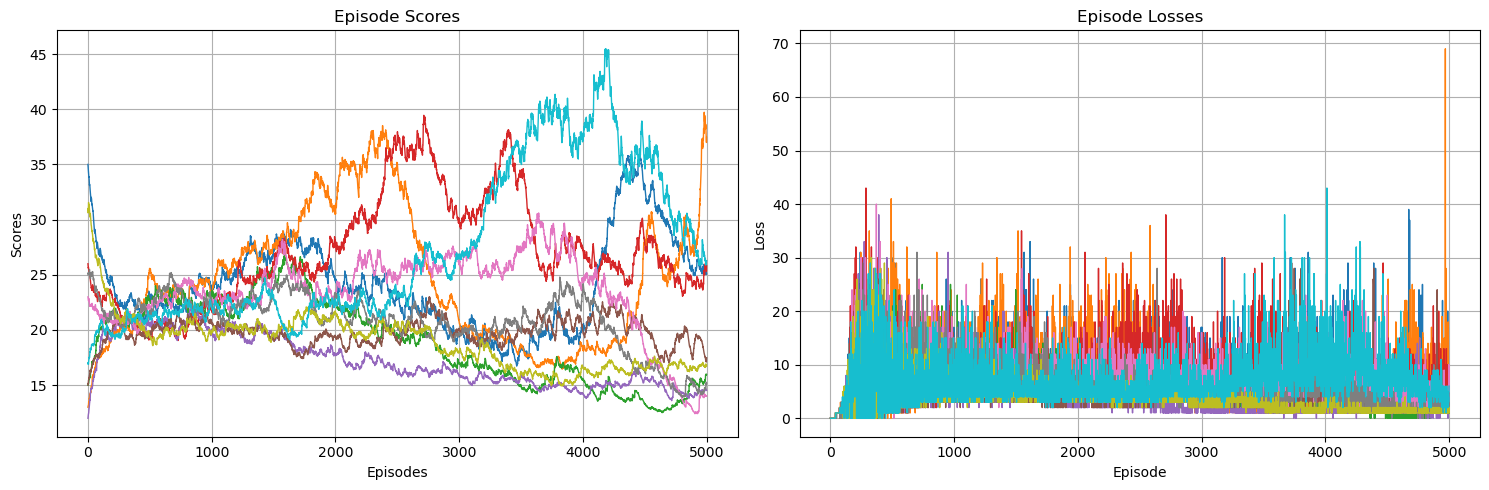

In [6]:
import matplotlib.pyplot as plt
import os
import json

# Define the path to the parent folder containing subfolders
parent_folder = './saved_models/pole_DQN'

# Initialize lists to store scores and losses
all_scores = []
all_losses = []

# Iterate over subfolders
for i in range(10):  # Assuming you have 10 subfolders named train_DQN_pp_0 to train_DQN_pp_9
    folder_name = f'train_DQN_pp_{i}'
    subfolder_path = os.path.join(parent_folder, folder_name)

    # Define the paths to the JSON files
    scores_file = os.path.join(subfolder_path, 'scores_record.json')
    loss_file = os.path.join(subfolder_path, 'loss_record.json')

    # Load scores_record from the JSON file
    with open(scores_file, 'r') as f:
        loaded_scores_record = json.load(f)

    # Load loss_record from the JSON file
    with open(loss_file, 'r') as f:
        loaded_loss_record = json.load(f)

    # Accumulate scores and losses
    all_scores.append(loaded_scores_record)
    all_losses.append(loaded_loss_record)

# Plotting the metrics
plt.figure(figsize=(15, 5))

# Plot Rewards
plt.subplot(1, 2, 1)
for scores in all_scores:
    plt.plot(scores, linewidth=1)
plt.title('Episode Scores')
plt.xlabel('Episodes')
plt.ylabel('Scores')
plt.grid(True)

# Plot Losses
plt.subplot(1, 2, 2)
for losses in all_losses:
    plt.plot(losses,  linewidth=1)
plt.title('Episode Losses')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.grid(True)

# Save the plots
plt.savefig('pole_results_DQN.png')

plt.tight_layout()
plt.show()


## Combined graphs

In [7]:
import json
import numpy as np

# Initialize lists to store scores and losses for all runs
all_scores = []
all_losses = []
parent_folder = './saved_models/pole_DQN'
# Load scores_record and loss_record from JSON files for all runs
for i in range(10):
    # Define the path to the JSON files
    scores_file = f'{parent_folder}/train_DQN_pp_{i}/scores_record.json'
    loss_file = f'{parent_folder}/train_DQN_pp_{i}/loss_record.json'

    # Load scores_record from the JSON file
    with open(scores_file, 'r') as f:
        loaded_scores_record = json.load(f)

    # Load loss_record from the JSON file
    with open(loss_file, 'r') as f:
        loaded_loss_record = json.load(f)

    all_scores.append(loaded_scores_record)
    all_losses.append(loaded_loss_record)

# Convert lists to numpy arrays for easier processing
all_scores = np.array(all_scores)
all_losses = np.array(all_losses)

# Calculate max, min, and average values for scores and losses
max_scores = np.max(all_scores, axis=0)
min_scores = np.min(all_scores, axis=0)
avg_scores = np.mean(all_scores, axis=0)

max_losses = np.max(all_losses, axis=0)
min_losses = np.min(all_losses, axis=0)
avg_losses = np.mean(all_losses, axis=0)

# Print results
print("Max Scores:", max_scores)
print("Min Scores:", min_scores)
print("Average Scores:", avg_scores)

print("Max Losses:", max_losses)
print("Min Losses:", min_losses)
print("Average Losses:", avg_losses)


Max Scores: [35.         34.86       34.7614     ... 37.26387272 36.99123399
 37.46132165]
Min Scores: [12.         12.11       12.1389     ... 14.00753106 14.03745575
 14.03708119]
Average Scores: [21.2        21.187      21.14313    ... 20.75244154 20.76391712
 20.86427795]
Max Losses: [ 0  0  0 ... 10  8  9]
Min Losses: [0 0 0 ... 1 1 1]
Average Losses: [0.  0.  0.  ... 3.6 3.5 3.5]


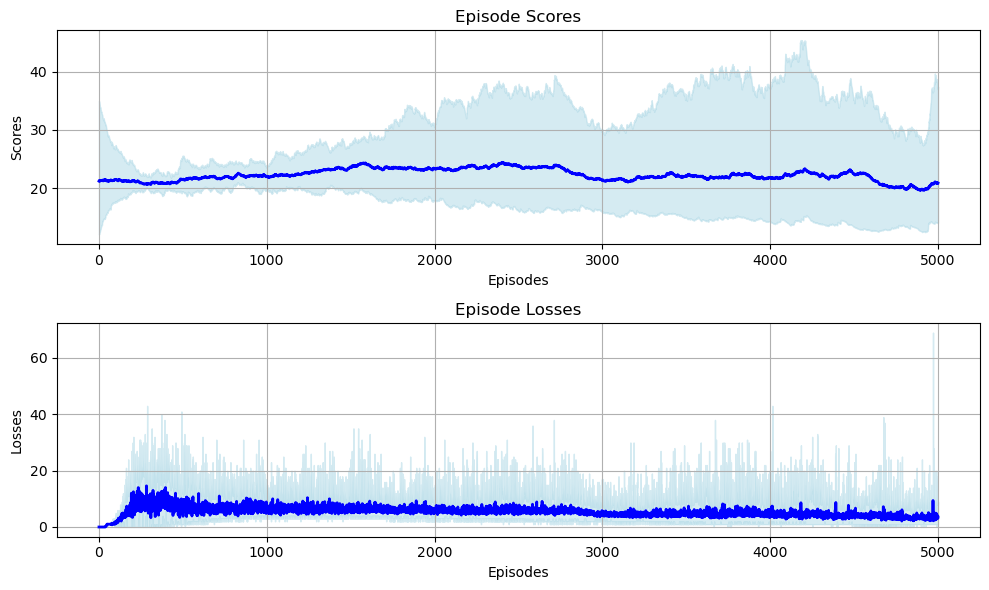

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have computed max_scores, min_scores, avg_scores, max_losses, min_losses, and avg_losses

# Create an array for the episode numbers (assuming they are from 1 to 5000)
episodes = np.arange(1, 5001)

# Plotting the metrics
plt.figure(figsize=(10, 6))

# Plot Scores
plt.subplot(2, 1, 1)
plt.fill_between(episodes, min_scores, max_scores, color='lightblue', alpha=0.5)
plt.plot(episodes, avg_scores, color='blue', linewidth=2)
plt.title('Episode Scores')
plt.xlabel('Episodes')
plt.ylabel('Scores')
plt.grid(True)

# Plot Losses
plt.subplot(2, 1, 2)
plt.fill_between(episodes, min_losses, max_losses, color='lightblue', alpha=0.5)
plt.plot(episodes, avg_losses, color='blue', linewidth=2)
plt.title('Episode Losses')
plt.xlabel('Episodes')
plt.ylabel('Losses')
plt.grid(True)

# Save the plots
plt.savefig('pole_results_combined.png')

plt.tight_layout()
plt.show()
